In [71]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


In [72]:
game=pd.read_csv("games.csv")

In [73]:
game.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [74]:
game.shape

(81312, 20)

In [75]:
 game.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

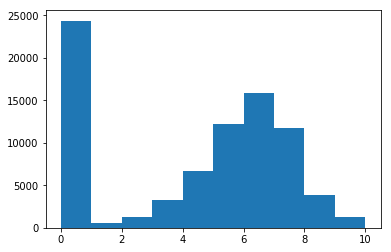

In [76]:
plt.hist(game["average_rating"])
plt.show()

In [77]:
game[game["average_rating"]==0].iloc[0].head()

id                      318
type              boardgame
name             Looney Leo
yearpublished             0
minplayers                0
Name: 13048, dtype: object

In [78]:
game[game["average_rating"]>0].iloc[0].head()

id                           12333
type                     boardgame
name             Twilight Struggle
yearpublished                 2005
minplayers                       2
Name: 0, dtype: object

In [79]:
new_game=game[game["users_rated"]>0].head()

In [80]:
new_game=game.dropna(axis=0,inplace=True)


In [81]:
new_game

In [82]:
game.shape

(81268, 20)

(array([24374.,   606.,  1324.,  3303.,  6681., 12264., 15835., 11733.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

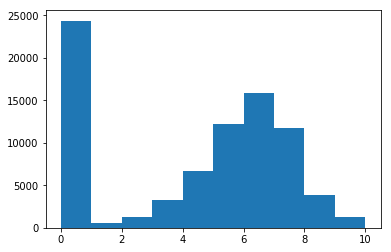

In [83]:
plt.hist(game["average_rating"])
#plt.show()

In [84]:
sns.set


<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

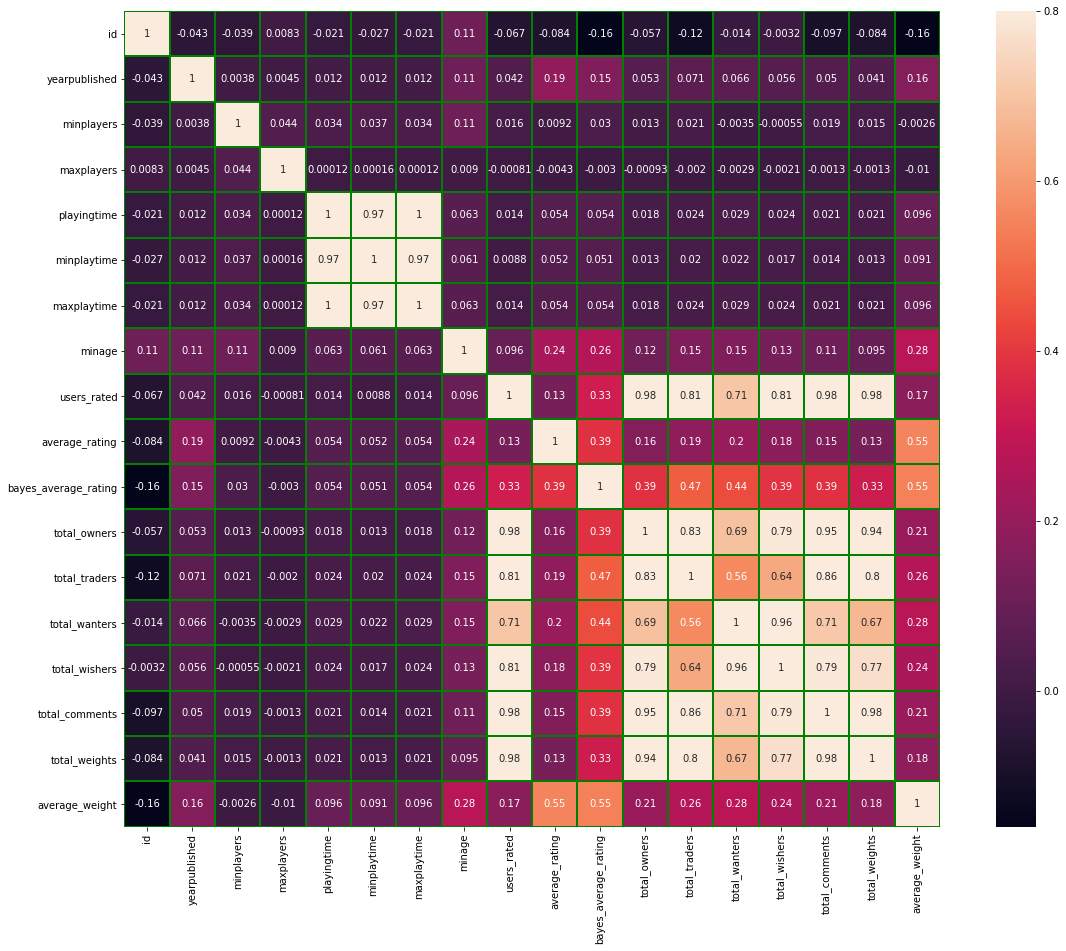

In [85]:
plt.figure(figsize=(20,15))
sns.heatmap(game.corr(),annot=True,linecolor="g",Linewidths="1",vmax=.8,square=True)

In [91]:
columns=game.columns.tolist()
columns=[c for c in columns if c not in ["id","type","name","average_rating","bayes_average_rating"]]
target="average_rating"

In [92]:
from sklearn.model_selection  import train_test_split
train=game.sample(frac=.8,random_state=5)
test=game.loc[~game.index.isin(train.index)]
print(train.shape)
print(test.shape)

(65014, 20)
(16254, 20)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# prediction on data set

In [96]:
predictions=model.predict(test[columns])

In [97]:
mean_squared_error(predictions,test[target])

6.2164411238903865

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
model1=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

In [115]:
model1.fit(test[columns],test[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [116]:
predictions=model1.predict(test[columns])

In [118]:
mean_squared_error(predictions,test[target])

0.7466936005202053

In [119]:
test[columns].iloc[0]

yearpublished      2005.0000
minplayers            2.0000
maxplayers            2.0000
playingtime         180.0000
minplaytime         180.0000
maxplaytime         180.0000
minage               13.0000
users_rated       20113.0000
total_owners      26647.0000
total_traders       372.0000
total_wanters      1219.0000
total_wishers      5865.0000
total_comments     5347.0000
total_weights      2562.0000
average_weight        3.4785
Name: 0, dtype: float64

In [124]:
rating_lr=model.predict(test[columns].iloc[0].values.reshape(1,-1))

In [125]:
rating_lr

array([7.73074906])

In [126]:
rating_fr=model1.predict(test[columns].iloc[0].values.reshape(1,-1))

In [127]:
rating_fr

array([7.73074906])

In [128]:
test[target].iloc[0]

8.33774